In [1]:
###########################################
# ACP decathlon                           #
###########################################

#librairie
install.packages("FactoMineR")
library(FactoMineR)

Installing package into 'C:/Users/ppeton/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
also installing the dependencies 'minqa', 'nloptr', 'Rcpp', 'RcppEigen', 'lme4', 'SparseM', 'MatrixModels', 'pbkrtest', 'quantreg', 'car', 'ellipse', 'flashClust', 'leaps', 'scatterplot3d'



package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'Rcpp' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'lme4' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'MatrixModels' successfully unpacked and MD5 sums checked
package 'pbkrtest' successfully unpacked and MD5 sums checked
package 'quantreg' successfully unpacked and MD5 sums checked
package 'car' successfully unpacked and MD5 sums checked
package 'ellipse' successfully unpacked and MD5 sums checked
package 'flashClust' successfully unpacked and MD5 sums checked
package 'leaps' successfully unpacked and MD5 sums checked
package 'scatterplot3d' successfully unpacked and MD5 sums checked
package 'FactoMineR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ppeton\AppData\Local\Temp\Rtmp

In [45]:
#Données 
data(decathlon)
#?decathlon
head(decathlon)
str(decathlon)

#Données des JO
JO<-decathlon[17:41,]

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar
WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.1,6,8030,Decastar


'data.frame':	41 obs. of  13 variables:
 $ 100m       : num  11 10.8 11 11 11.3 ...
 $ Long.jump  : num  7.58 7.4 7.3 7.23 7.09 7.6 7.3 7.31 6.81 7.56 ...
 $ Shot.put   : num  14.8 14.3 14.8 14.2 15.2 ...
 $ High.jump  : num  2.07 1.86 2.04 1.92 2.1 1.98 2.01 2.13 1.95 1.86 ...
 $ 400m       : num  49.8 49.4 48.4 48.9 50.4 ...
 $ 110m.hurdle: num  14.7 14.1 14.1 15 15.3 ...
 $ Discus     : num  43.8 50.7 49 40.9 46.3 ...
 $ Pole.vault : num  5.02 4.92 4.92 5.32 4.72 4.92 4.42 4.42 4.92 4.82 ...
 $ Javeline   : num  63.2 60.1 50.3 62.8 63.4 ...
 $ 1500m      : num  292 302 300 280 276 ...
 $ Rank       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Points     : int  8217 8122 8099 8067 8036 8030 8004 7995 7802 7733 ...
 $ Competition: Factor w/ 2 levels "Decastar","OlympicG": 1 1 1 1 1 1 1 1 1 1 ...


In [46]:
#nom + classement dans les noms de ligne
rank<-as.vector(t(JO[11]))
class(rank)
class(row.names(JO))
new.name<-paste(rank, "-", rownames(JO))
rownames(JO)<-new.name

#Récupération des épreuves
Epreuve<-JO[1:10]
head(Epreuve)

[1] "integer"

[1] "character"

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m
4 - Macey,10.89,7.47,15.73,2.15,48.97,14.56,48.34,4.4,58.46,265.42
5 - Warners,10.62,7.74,14.48,1.97,47.97,14.01,43.73,4.9,55.39,278.05
6 - Zsivoczky,10.91,7.14,15.31,2.12,49.40,14.95,45.62,4.7,63.45,269.54
7 - Hernu,10.97,7.19,14.65,2.03,48.73,14.25,44.72,4.8,57.76,264.35
8 - Nool,10.80,7.53,14.26,1.88,48.81,14.80,42.05,5.4,61.33,276.33
9 - Bernard,10.69,7.48,14.80,2.12,49.13,14.17,44.75,4.4,55.27,276.31


In [4]:
#Statistique descriptives 
summary(Epreuve)

      100m         Long.jump        Shot.put       High.jump    
 Min.   :10.55   Min.   :6.610   Min.   :13.07   Min.   :1.850  
 1st Qu.:10.86   1st Qu.:6.990   1st Qu.:13.88   1st Qu.:1.910  
 Median :10.92   Median :7.260   Median :14.65   Median :1.940  
 Mean   :10.95   Mean   :7.193   Mean   :14.48   Mean   :1.963  
 3rd Qu.:11.08   3rd Qu.:7.380   3rd Qu.:14.97   3rd Qu.:2.030  
 Max.   :11.36   Max.   :7.740   Max.   :15.73   Max.   :2.150  
      400m        110m.hurdle        Discus        Pole.vault      Javeline    
 Min.   :47.97   Min.   :14.01   Min.   :39.83   Min.   :4.20   Min.   :50.62  
 1st Qu.:49.11   1st Qu.:14.25   1st Qu.:41.90   1st Qu.:4.50   1st Qu.:55.27  
 Median :49.41   Median :14.56   Median :43.73   Median :4.70   Median :58.62  
 Mean   :49.79   Mean   :14.61   Mean   :43.68   Mean   :4.72   Mean   :58.19  
 3rd Qu.:50.54   3rd Qu.:14.96   3rd Qu.:45.13   3rd Qu.:4.90   3rd Qu.:60.88  
 Max.   :53.20   Max.   :15.39   Max.   :49.02   Max.   :5.40   M

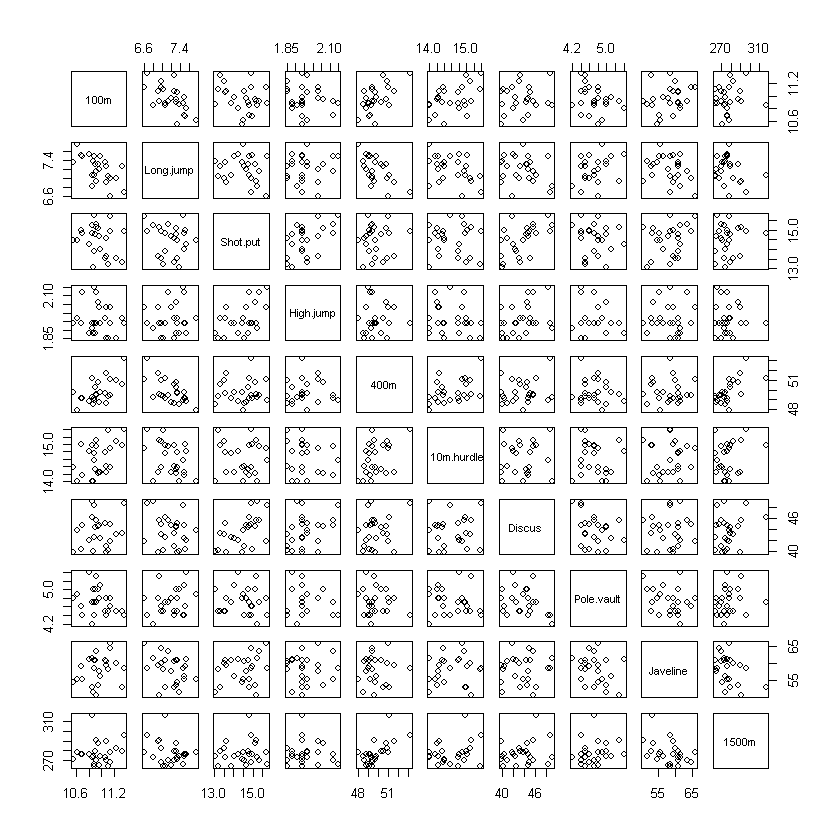

In [5]:
# Matrice des nuages de points
pairs(Epreuve)

In [6]:
#ACP
res.acp<-PCA(Epreuve, scale.unit=TRUE, ncp=10, graph=FALSE)
#Epreuve: le data frame utilisé
#scale.unit: pour choisir de centrer-réduire ou non les variables 
#ncp: le nombre de dimensions à garder dans les résultats (commencer par le nombre de variables)
#graph: pour choisir de faire apparaître les graphiques ou non

In [7]:
#résumé de l’acp
summary(res.acp)
attributes(res.acp)


Call:
PCA(X = Epreuve, scale.unit = TRUE, ncp = 10, graph = FALSE) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               3.009   2.058   1.699   0.881   0.648   0.630   0.472
% of var.             30.091  20.578  16.987   8.809   6.480   6.300   4.717
Cumulative % of var.  30.091  50.669  67.657  76.466  82.946  89.245  93.963
                       Dim.8   Dim.9  Dim.10
Variance               0.322   0.166   0.116
% of var.              3.221   1.660   1.156
Cumulative % of var.  97.184  98.844 100.000

Individuals (the 10 first)
                    Dist    Dim.1    ctr   cos2    Dim.2    ctr   cos2    Dim.3
4 - Macey       |  3.838 | -0.517  0.355  0.018 |  3.441 23.017  0.804 | -0.375
5 - Warners     |  3.488 | -3.202 13.629  0.843 |  0.581  0.657  0.028 |  0.899
6 - Zsivoczky   |  2.889 |  0.408  0.222  0.020 |  2.182  9.254  0.570 | -0.825
7 - Hernu       |  1.938 | -0.990  1.303  0.261 |  0.980  1.865  0.255 | -0.553
8

$names
[1] "eig"  "var"  "ind"  "svd"  "call"

$class
[1] "PCA"   "list "

Warning message in plot.window(xlim, ylim, log = log, ...):
"paramètre graphique "type" incorrect"Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
"paramètre graphique "type" incorrect"Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
"paramètre graphique "type" incorrect"Warning message in axis(if (horiz) 1 else 2, cex.axis = cex.axis, ...):
"paramètre graphique "type" incorrect"

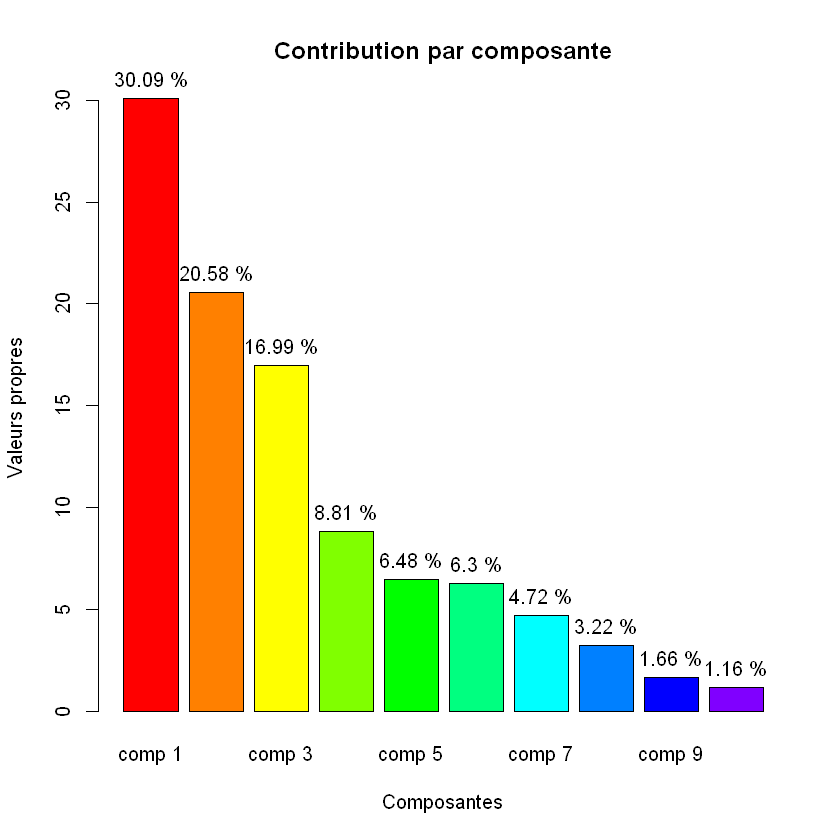

In [8]:
#graphique des valeurs propres
graph.vp<-barplot(res.acp$eig[,2], col=rainbow(12),type="b", ylab="Valeurs propres", xlab="Composantes", main="Contribution par composante")
text(graph.vp, res.acp$eig[,2], labels=paste(round(res.acp$eig[,2],2),"%"), pos=3, xpd=TRUE)

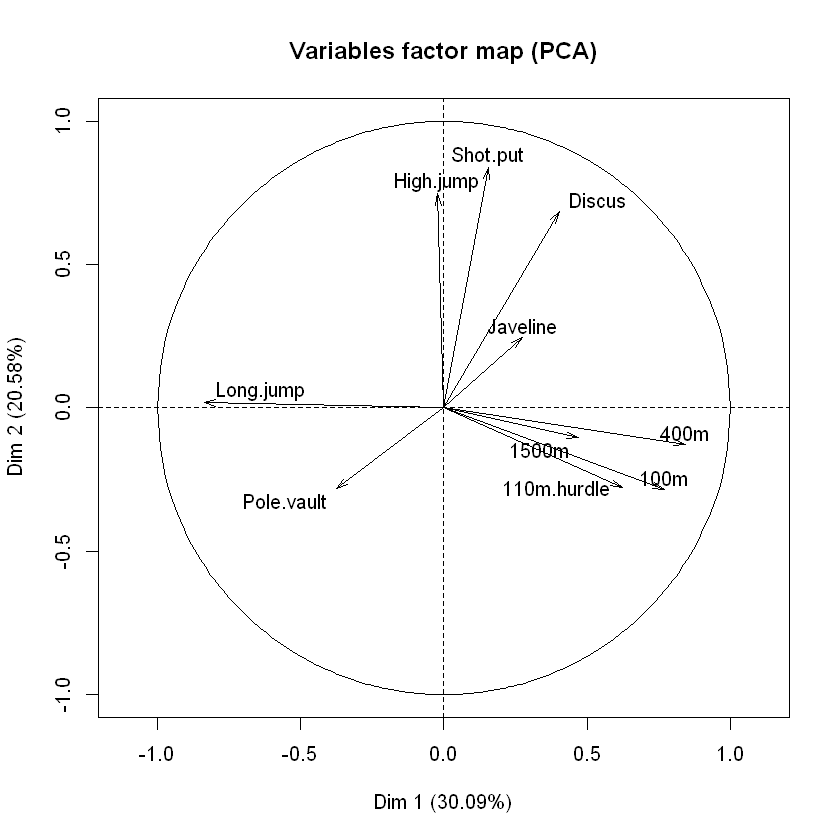

In [9]:
#graphique des variables
plot.PCA(res.acp, axes=c(1,2), choix="var")

In [10]:
#Contribution des variables pour les deux premières dimensions : 
dimdesc(res.acp, axes=c(1,2))

,correlation,p.value
400m,0.8432369,1.210820e-07
100m,0.7681683,7.337164e-06
110m.hurdle,0.6233604,8.716697e-04
1500m,0.4677106,1.839276e-02
Discus,0.4017598,4.650958e-02
Long.jump,-0.8363773,1.912185e-07
,correlation,p.value
Shot.put,0.8395855,1.548320e-07
High.jump,0.7467450,1.806526e-05
Discus,0.6852567,1.569474e-04


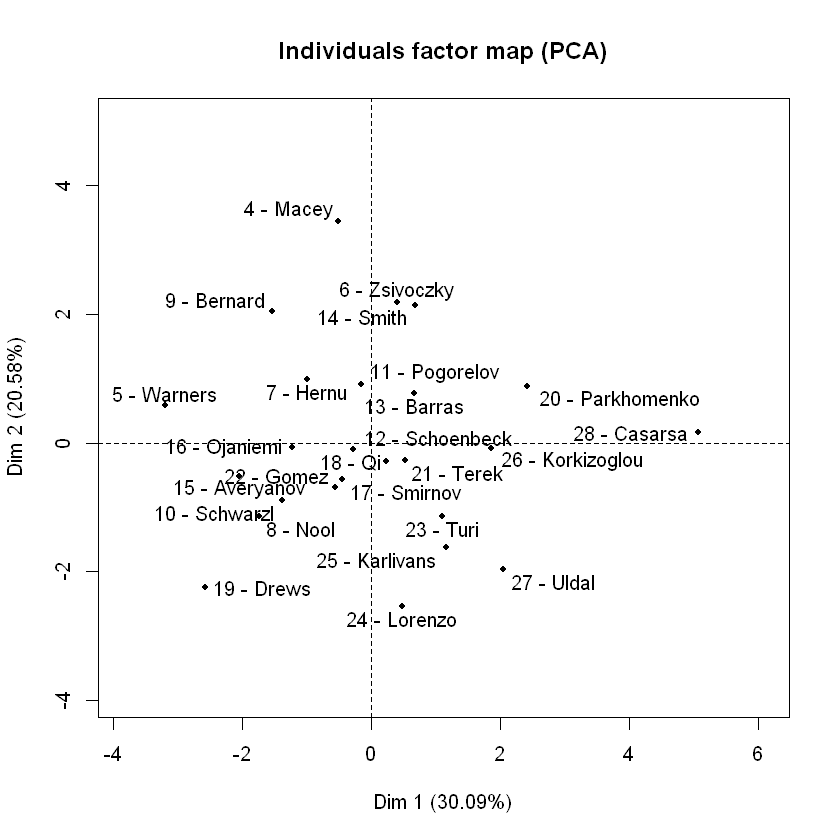

In [11]:
#graphique des individus
plot.PCA(res.acp, axes=c(1,2), choix="ind")

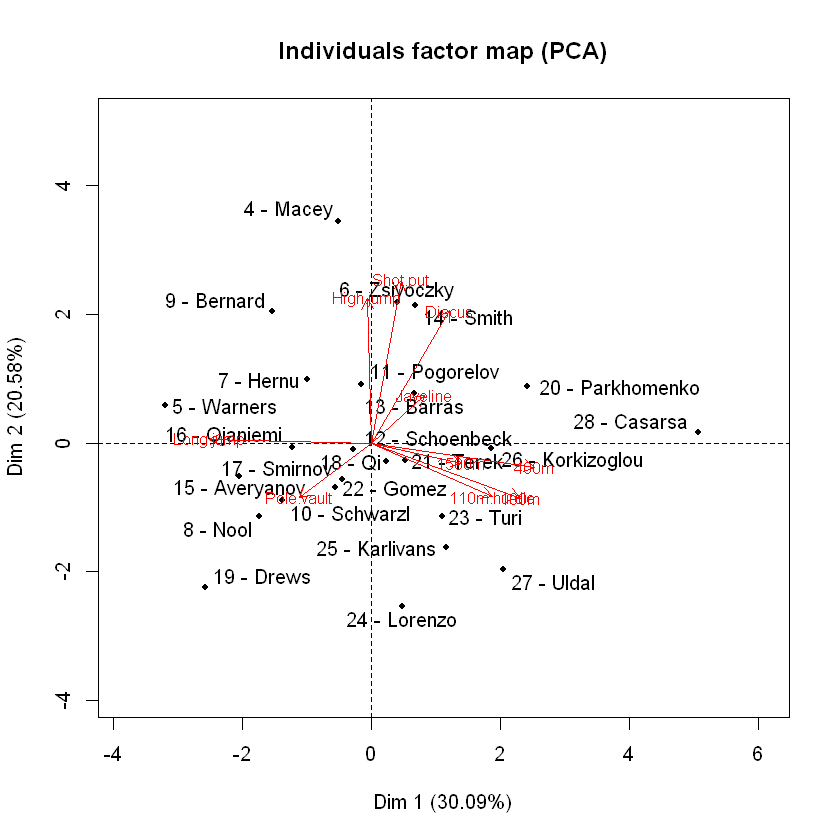

In [12]:
#Superposition variables et individus
plot.PCA(res.acp, axes=c(1,2), choix="ind")
p<-ncol(Epreuve)	
for(i in 1:p){
	arrows(0, 0, res.acp$var$coord[i,1]*3, res.acp$var$coord[i,2]*3, col="red", length=0.1)
}
text(res.acp$var$coord[,1]*3, res.acp$var$coord[,2]*3, labels=colnames(Epreuve), col="red", cex=0.8) 

In [13]:
#Rajout d'une variable illustrative
Epreuve<-JO[1:11]
res.acp<-PCA(Epreuve, scale.unit=TRUE, ncp=5, graph=TRUE, quanti.sup=11)
res.acp$var$coord[,1]

100m   Long.jump    Shot.put   High.jump        400m 110m.hurdle 
 0.76816832 -0.83637726  0.15563345 -0.02159753  0.84323693  0.62336042 
     Discus  Pole.vault    Javeline       1500m 
 0.40175981 -0.37488030  0.27292758  0.46771059